In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
import math
import scipy.stats as st

In [2]:
N=500
xgauss1= [rd.gauss(0,1) for i in range(N)]
xgauss2= [rd.gauss(0,1) for i in range(N)]

##### GROUPE I

In [ ]:
np.random.randint()

In [3]:
mean1 = np.array([2.5,2.5])
cov1 = np.array([[2,-0.8],[-0.8,2]])
N1 = 500
X1 = np.random.multivariate_normal(mean1, cov1, N1)
label1 = 1

##### GROUPE II

In [4]:
mean2 = np.array([0,0])
cov2 = np.array([[1,0],[0,1]])
N2 = 1000
X2 = np.random.multivariate_normal(mean2, cov2, N2)
label2 = 0

#### dataset

In [5]:
x1,x2 = [],[]
for i in range(N1):
    x1 += [list(X1[i,]) + [label1]]
for i in range(N2):
    x2 += [list(X2[i,]) + [label2]]
X = np.array(x1+x2)    

#### means

In [6]:
means1 = np.mean(X1,axis=0)
means1

array([2.58918608, 2.4914582 ])

In [7]:
means2 = np.mean(X2,axis=0)
means2

array([ 0.00855137, -0.04604506])

#### variance covariance

In [8]:
covarr1 = np.cov(X1[:,0],X1[:,1])

In [9]:
covarr2 = np.cov(X2[:,0],X2[:,1])

In [10]:
x1_min, x1_max=min(X[:,0]), max(X[:,0])
x2_min, x2_max=min(X[:,1]), max(X[:,1])
Neval=50;h1=(x1_max-x1_min)/Neval;h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2));

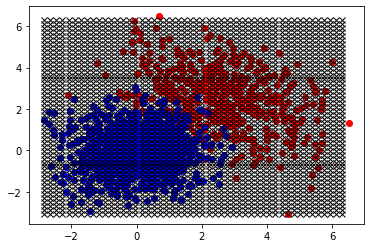

In [11]:
plt.plot(X1[:,0],X1[:,1],'ro')
plt.plot(X2[:,0],X2[:,1],'bo')
plt.plot(x1Eval,x2Eval,'kx')

In [12]:
prior_proba_class1 = np.sum((X[:,2]==1.0))/len(X[:,0])
prior_proba_class0 = np.sum((X[:,2]==0))/len(X[:,0])
likelihood_prob1 = lambda x : st.multivariate_normal.pdf(x,
                                                         mean = mean1,
                                                         cov = cov1)
likelihood_prob0 = lambda x : st.multivariate_normal.pdf(x,
                                                         mean = mean2,
                                                         cov = cov2)

posteriori_prob_x1 = lambda x : (likelihood_prob1(x) * prior_proba_class1)/ (likelihood_prob1(x) * prior_proba_class1 + likelihood_prob0(x) * prior_proba_class0)

posteriori_prob_x0 = lambda x : (likelihood_prob0(x) * prior_proba_class0)/ (likelihood_prob1(x) * prior_proba_class1 + likelihood_prob0(x) * prior_proba_class0)

prob_x_in_1 = np.array(list(map(posteriori_prob_x1, X[:,0:2])))
prob_x_in_0 = np.array(list(map(posteriori_prob_x0, X[:,0:2])))


y_hat = 1.0*(prob_x_in_1>0.5)

#(likelihood_prob1 * prior_proba_class1)/(likelihood_prob1*prior_proba_class1+likelihood_prob0*prior_proba_class0)

In [13]:
X_ = []
for i in range(N1+N2):
    X_ += [list(X[i,0:2]) + [y_hat[i],prob_x_in_1[i],prob_x_in_0[i]]]
X_pred = np.array(X_)

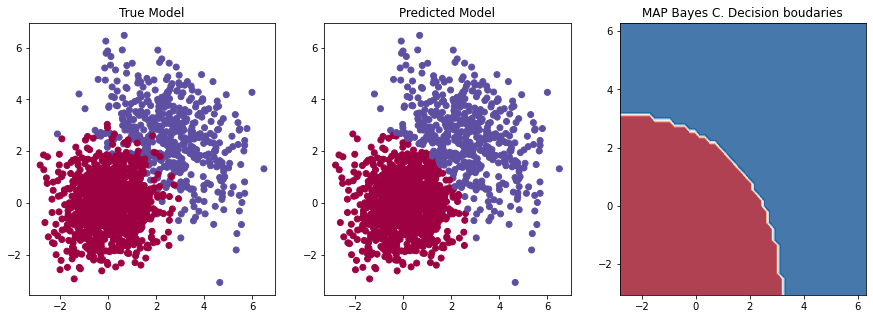

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pred[:,0],X_pred[:,1],c = X_pred[:,2],cmap = 'Spectral')
plt.title('Predicted Model')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP Bayes C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = 1.0*(np.array(list(map(posteriori_prob_x1, tt )))>0.5)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [15]:
Z

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [16]:
tt =np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
tt.shape

(2500, 2)

In [17]:
FP_function = lambda x_pred,x_actual : x_pred==1 and x_actual==0
FN_function = lambda x_pred,x_actual : x_pred==0 and x_actual==1
TN_function = lambda x_pred,x_actual : x_pred==0 and x_actual==0
TP_function = lambda x_pred,x_actual : x_pred==1 and x_actual==1

In [18]:
nb_error = np.sum(X_pred[:,2]!=X[:,2])
nb_FP = np.sum(list(map(FP_function, X_pred[:,2],X[:,2])))
nb_FN = np.sum(list(map(FN_function, X_pred[:,2],X[:,2])))
nb_TN = np.sum(list(map(FN_function, X_pred[:,2],X[:,2])))
nb_TP = np.sum(list(map(FN_function, X_pred[:,2],X[:,2])))

In [19]:
#accuracy
accuracy = 100*(len(X_pred[:,2])-nb_error)/len(X_pred[:,2])
#precision
precision = nb_TP/(nb_TP + nb_FP)
#recall
recall = nb_TP/(nb_TP + nb_FN)
#F1_score
Fscore = 2*(precision * recall)/(precision + recall)

performance = {'accuracy' : accuracy, 'precision' : precision, 'recall': recall, 'F1-score': Fscore}

In [20]:
performance

{'accuracy': 96.0,
 'precision': 0.55,
 'recall': 0.5,
 'F1-score': 0.5238095238095238}

Text(0.5, 1.0, 'P(Y=G2/X=x)')

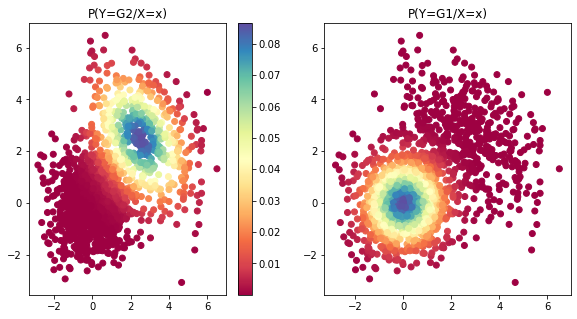

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pred[:,0],X_pred[:,1],c = np.array(list(map(likelihood_prob0,X[:,0:2]))),cmap = 'Spectral')
plt.title('P(Y=G1/X=x)')
plt.subplot(131)
plt.scatter(X_pred[:,0],X_pred[:,1],c = np.array(list(map(likelihood_prob1,X[:,0:2]))),cmap = 'Spectral')
plt.colorbar()
plt.title('P(Y=G2/X=x)')

In [22]:
#scikit-learn
from sklearn.naive_bayes import GaussianNB
#initial data set: X(inputs), y(output)
gnb=GaussianNB();
gnbfit=gnb.fit(X[:,0:2], X[:,2]);
y_pred=gnbfit.predict(X[:,0:2])

#### Model parameter analysis

In [23]:
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [24]:
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [25]:
#class count
gnbfit.class_count_

array([1000.,  500.])

In [26]:
#class_prior_
gnbfit.class_prior_
#help(GaussianNB())

array([0.66666667, 0.33333333])

In [27]:
#classes_
gnbfit.classes_

array([0., 1.])

In [28]:
# means 
{'direct' : np.array([means2, means1]),'sklearn' : gnbfit.theta_}

{'direct': array([[ 0.00855137, -0.04604506],
        [ 2.58918608,  2.4914582 ]]),
 'sklearn': array([[ 0.00855137, -0.04604506],
        [ 2.58918608,  2.4914582 ]])}

In [29]:
covarr1

array([[ 2.09991791, -0.72380969],
       [-0.72380969,  1.99444949]])

In [30]:
gnbfit.sigma_

array([[1.00770815, 1.03084386],
       [2.09571808, 1.99046059]])

In [31]:
from sklearn import metrics
print("accuracy : " ,metrics.accuracy_score(X[:,2],y_pred))

accuracy :  0.96


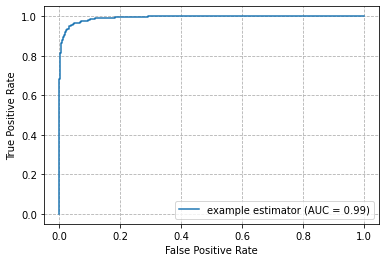

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(X[:,2], gnbfit.predict_proba(X[:,0:2])[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.grid(linestyle = 'dashed')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test =  train_test_split(X[:,0:2], 
                                                     X[:,2], 
                                                     test_size=1/3)
gnb = GaussianNB()
gnbfit = gnb.fit(X_train, y_train)
y_pred = gnbfit.predict(X_test)
E_test = (y_test != y_pred).sum()/len(y_test)
print("Error on the test data set %5.2f ->", E_test)

Error on the test data set %5.2f -> 0.036


In [34]:
for _ in range(5):
    X_train, X_test, y_train, y_test =  train_test_split(X[:,0:2], 
                                                     X[:,2], 
                                                     test_size=1/3)
    gnb = GaussianNB()
    gnbfit = gnb.fit(X_train, y_train)
    y_pred = gnbfit.predict(X_test)
    E_test = (y_test != y_pred).sum()/len(y_test)
    print("Error on the test data set %5.2f ->", E_test)

Error on the test data set %5.2f -> 0.04
Error on the test data set %5.2f -> 0.058
Error on the test data set %5.2f -> 0.05
Error on the test data set %5.2f -> 0.048
Error on the test data set %5.2f -> 0.042


In [35]:
from sklearn.model_selection import KFold

In [36]:
gnbfit

GaussianNB()

In [37]:
kf = KFold(n_splits= 5,shuffle=True)
accuracy_train, precision_train,recall_train, f1_train,auc_train = [],[],[],[],[]
accuracy_test, precision_test,recall_test, f1_test,auc_test = [],[],[],[],[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[:,0:2][train_index], X[:,0:2][test_index]
    y_train, y_test = X[:,2][train_index], X[:,2][test_index]
    gnb = GaussianNB()
    gnbfit = gnb.fit(X_train, y_train)
    y_pred = gnbfit.predict(X_test)
    y_pred_train = gnbfit.predict(X_train)
    
    accuracy_train+=[metrics.accuracy_score(y_train,y_pred_train)]
    precision_train+=[metrics.precision_score(y_train,y_pred_train)]
    recall_train+=[metrics.recall_score(y_train,y_pred_train)]
    f1_train+=[metrics.f1_score(y_train,y_pred_train)]
    auc_train+=[metrics.roc_auc_score(y_train,y_pred_train)]
    
    accuracy_test+=[metrics.accuracy_score(y_test,y_pred)]
    precision_test+=[metrics.precision_score(y_test,y_pred)]
    recall_test+=[metrics.recall_score(y_test,y_pred)]
    f1_test+=[metrics.f1_score(y_test,y_pred)]
    auc_test+=[metrics.roc_auc_score(y_test,y_pred)]
    
data = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, auc_train, auc_test]
    
    

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1cdf706df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1cdf7174f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1cdf706a90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1cdf717bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1cdf717f10>,
 'means': []}

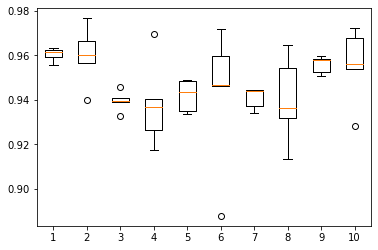

In [38]:
fig, ax = plt.subplots()
ax.boxplot(data)

##### LDA

In [39]:
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)

In [40]:
X_train

array([[ 5.57769178,  0.02379018],
       [ 0.59344655,  5.90836911],
       [ 2.3369781 ,  1.41363994],
       ...,
       [ 0.04459475,  0.55393239],
       [ 1.30650982, -0.54180568],
       [ 0.16395742, -0.48840361]])

In [41]:
X_train, X_test, y_train, y_test =  train_test_split(X[:,0:2], 
                                                     X[:,2], 
                                                     test_size=1/3)

In [42]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [43]:
y_pred_lda = lda.predict(X[:,0:2])

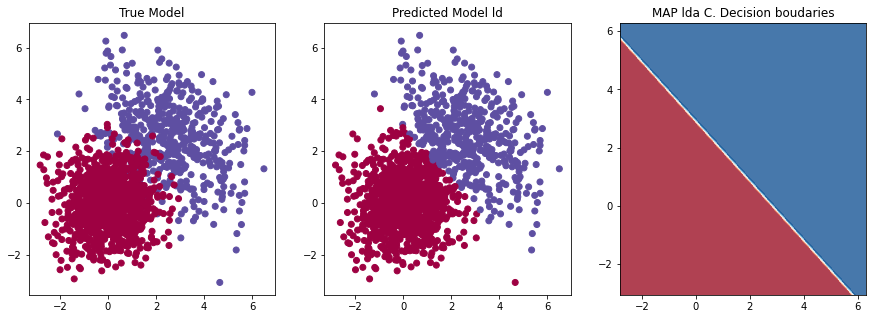

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pred[:,0],X_pred[:,1],c = y_pred_lda,cmap = 'Spectral')
plt.title('Predicted Model ld')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP lda C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = lda.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [45]:
lda.predict(tt)

array([0., 0., 0., ..., 1., 1., 1.])

#### QDA

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis();

In [47]:
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [50]:
#from sklearn.neighbors import KNeighborsClassifier
#knn=KNeighborsClassifier(n_neighbors=5);
y_pred_qda = qda.predict(X[:,0:2])

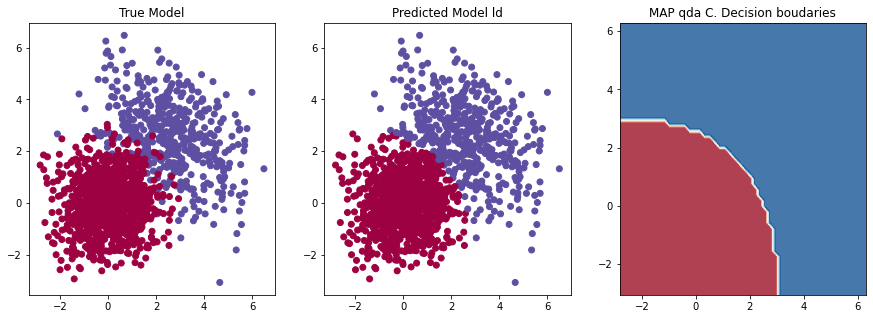

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pred[:,0],X_pred[:,1],c = y_pred_qda,cmap = 'Spectral')
plt.title('Predicted Model ld')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP qda C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = qda.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [52]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(C=1e5);

In [53]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [54]:
y_pred_log = logreg.predict(X[:,0:2])

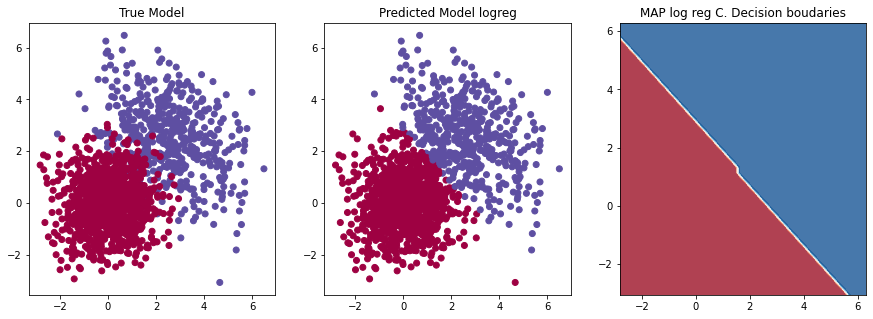

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pred[:,0],X_pred[:,1],c = y_pred_log,cmap = 'Spectral')
plt.title('Predicted Model logreg')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP log reg C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = logreg.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5);

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred_knn = knn.predict(X[:,0:2])

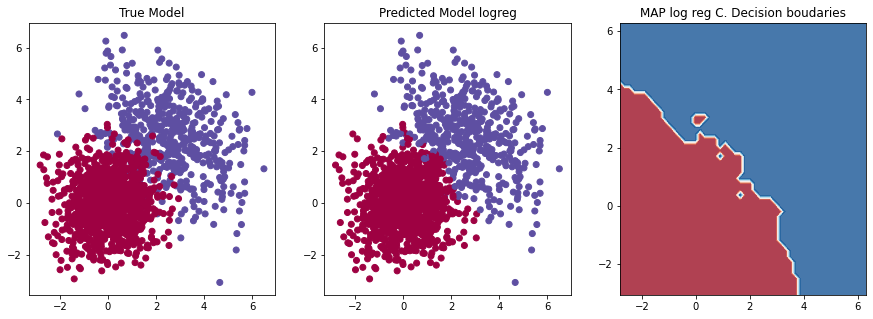

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pred[:,0],X_pred[:,1],c = y_pred_knn,cmap = 'Spectral')
plt.title('Predicted Model logreg')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP log reg C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = knn.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

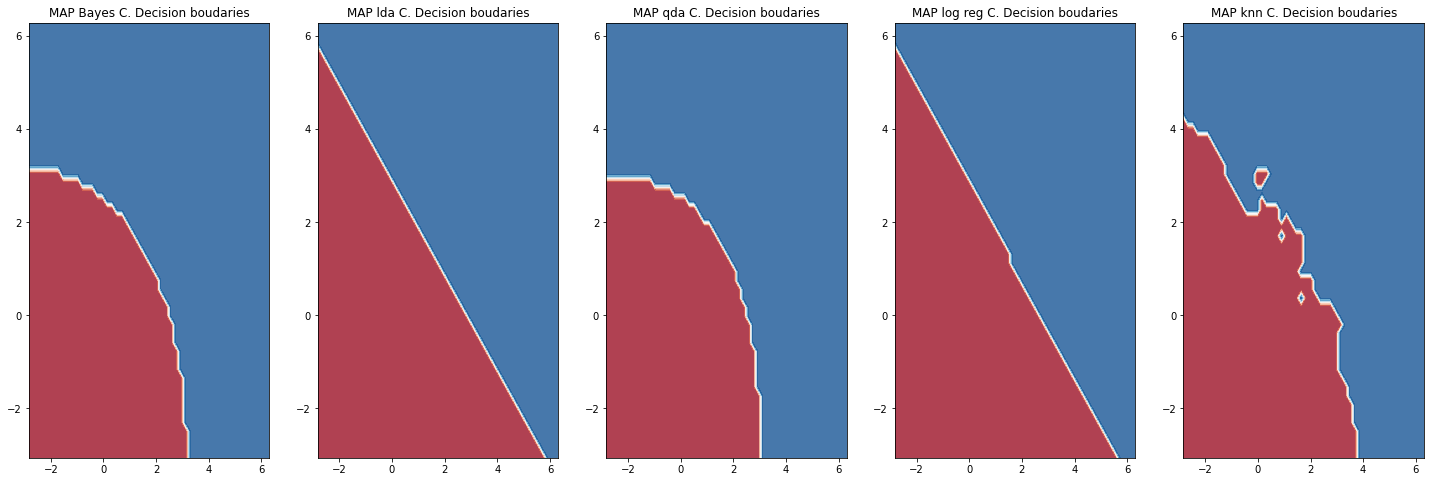

In [60]:
plt.figure(figsize=(25,8))
ax = plt.subplot(151)
ax.set_title('MAP Bayes C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = 1.0*(np.array(list(map(posteriori_prob_x1, tt )))>0.5)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
ax = plt.subplot(152)
ax.set_title('MAP lda C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = lda.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
ax = plt.subplot(153)
ax.set_title('MAP qda C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = qda.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
ax = plt.subplot(154)
ax.set_title('MAP log reg C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = logreg.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);
ax = plt.subplot(155)
ax.set_title('MAP knn C. Decision boudaries')
tt = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
Z = knn.predict(tt)
Z = Z.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8);

In [61]:
import pandas as pd
models = [gnb, lda, qda, logreg, knn]
models_name = ['gnb', 'lda', 'qda', 'logreg', 'knn']
kf = KFold(n_splits= 5,shuffle=True)

data_train = pd.DataFrame(columns = {'gnb' : [],
                               'lda' : [],
                               'qda' : [],
                               'logreg' : [],
                               'knn' : []})

data_test = pd.DataFrame(columns = {'gnb' : [],
                               'lda' : [],
                               'qda' : [],
                               'logreg' : [],
                               'knn' : []})
j = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[:,0:2][train_index], X[:,0:2][test_index]
    y_train, y_test = X[:,2][train_index], X[:,2][test_index]
    gnb = GaussianNB()
    lda = LinearDiscriminantAnalysis(n_components=2)
    qda=QuadraticDiscriminantAnalysis();
    logreg=linear_model.LogisticRegression(C=1e5);
    knn=KNeighborsClassifier(n_neighbors=5);
    i = 0
    for x in models:
        x.fit(X_train, y_train)
        data_test.loc[j,models_name[i]] = metrics.accuracy_score(y_test,x.predict(X_test))
        data_train.loc[j,models_name[i]] = metrics.accuracy_score(y_train,x.predict(X_train))
        i+=1
    gnbfit = gnb.fit(X_train, y_train)
    y_pred = gnbfit.predict(X_test)
    y_pred_train = gnbfit.predict(X_train)
    j+=1
#data = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, auc_train, auc_test]

In [63]:
data_train

,gnb,lda,qda,logreg,knn
0,0.964167,0.955833,0.963333,0.956667,0.973333
1,0.964167,0.961667,0.965,0.9625,0.970833
2,0.9625,0.9575,0.963333,0.96,0.97
3,0.956667,0.948333,0.956667,0.949167,0.965
4,0.953333,0.948333,0.955833,0.949167,0.960833


In [64]:
data_test

,gnb,lda,qda,logreg,knn
0,0.95,0.943333,0.946667,0.946667,0.946667
1,0.946667,0.926667,0.946667,0.936667,0.943333
2,0.943333,0.943333,0.946667,0.93,0.946667
3,0.976667,0.98,0.976667,0.976667,0.976667
4,0.983333,0.976667,0.983333,0.976667,0.97


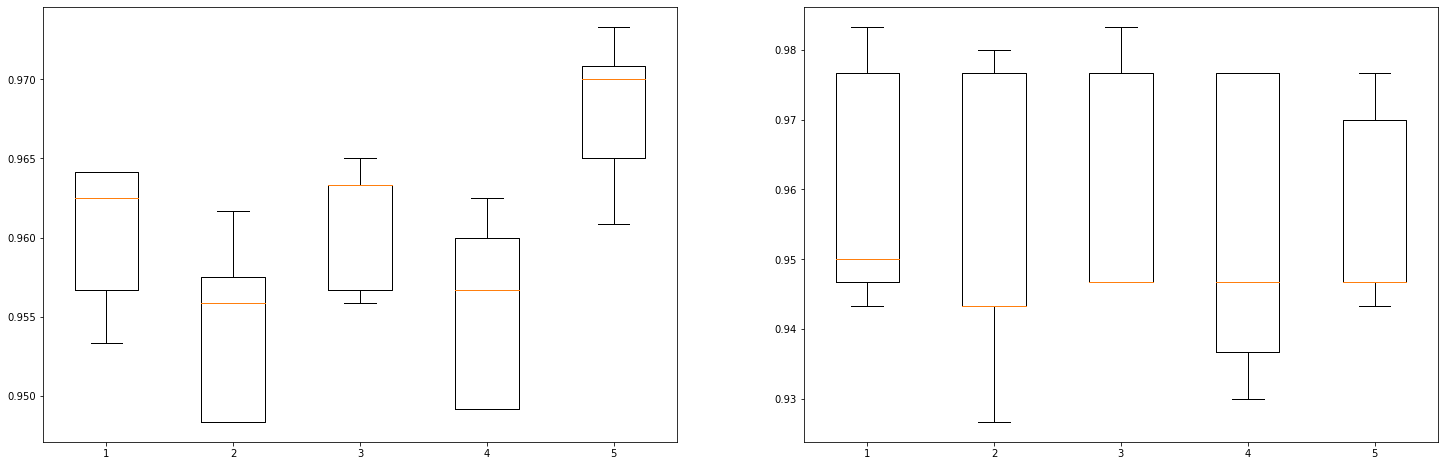

In [68]:
plt.figure(figsize=(25,8))
ax = plt.subplot(121)
ax.boxplot(data_train)
ax = plt.subplot(122)
ax.boxplot(data_test)
plt.show()

In [ ]:
import pandas as pd
data = pd.DataFrame(columns = {'gnb' : [],
                               'lda' : [],
                               'qda' : [],
                               'logreg' : [],
                               'knn' : []})

In [ ]:
data.loc[,'gnb'] = 2

In [ ]:
data

In [ ]:
models = [gnb, lda, qda, logreg, knn]

In [ ]:
models[0]